In [170]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [172]:
import seaborn as sns
%matplotlib inline

In [173]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

In [174]:
train = pd.read_csv('titanic_train.csv')

In [175]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


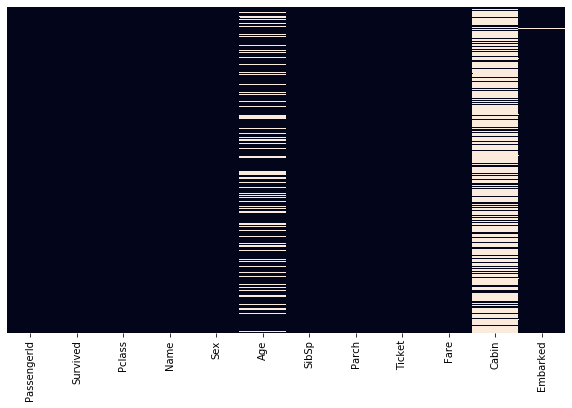

In [176]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(),yticklabels= False, cbar=False)

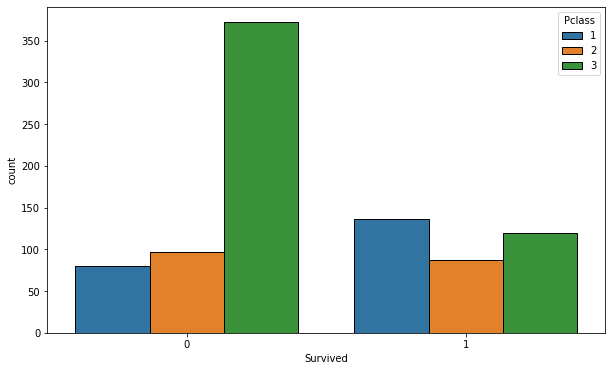

In [177]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue = 'Pclass',data = train)

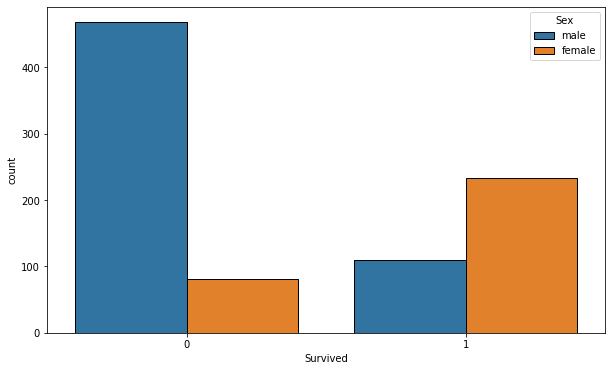

In [178]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue = 'Sex',data = train)

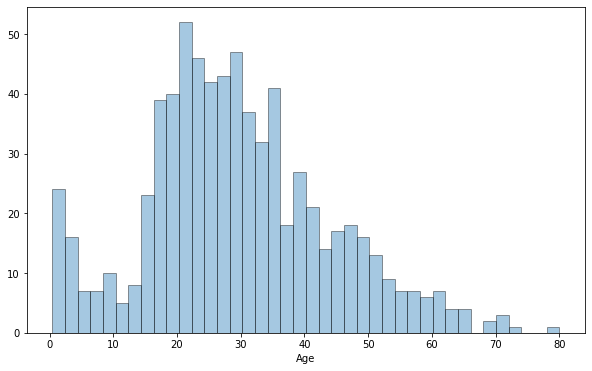

In [179]:
plt.figure(figsize=(10,6))
sns.distplot(train['Age'].dropna(),kde = False,bins = 40)

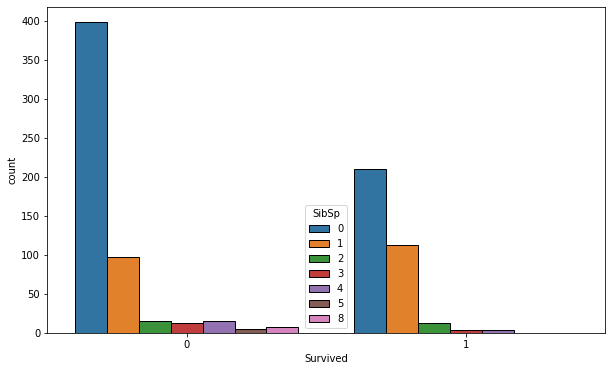

In [180]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='SibSp',data = train)

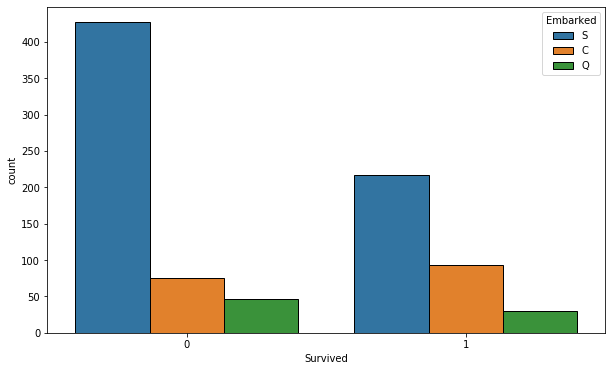

In [181]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Embarked',data = train)

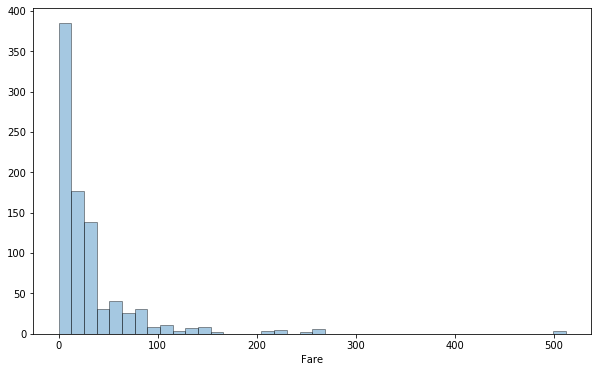

In [182]:
plt.figure(figsize=(10,6))
sns.distplot(train['Fare'],bins = 40,kde=False)

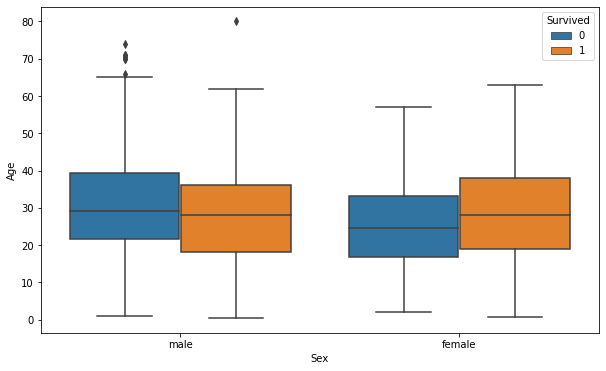

In [183]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sex',y='Age',hue ='Survived',data = train,)

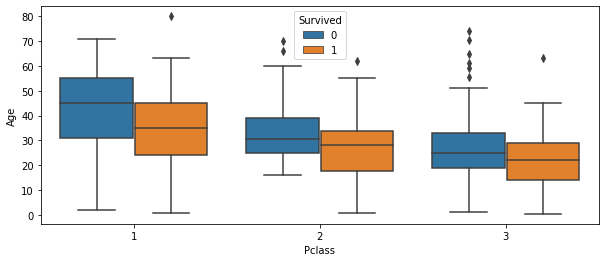

In [184]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass',y='Age',data = train,hue = 'Survived')

we have to fill the missing age data on the basis of these two boxplot

In [185]:
def missing_age(survived,pclass,age):
    if pd.isnull(age):
        
        if pclass==1:
            if survived ==0:
                return 46
            else: return 35
        elif  pclass==2:
            if survived == 0:
                return 31
            else: return 28
        elif pclass==3:
            if survived==0:
                return 25
            else: return 22
            
    else:
        return age
        

In [186]:
train['Age'] = train.apply(lambda x: missing_age(x['Survived'],x['Pclass'],x['Age']),axis=1)

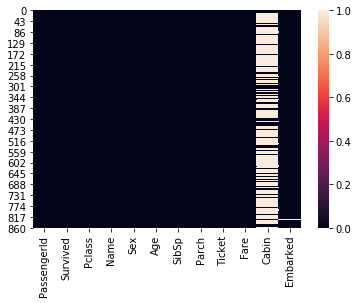

In [187]:
sns.heatmap(train.isnull())

In [188]:
train.drop(labels = 'Cabin', axis = 1 ,inplace=True) # drop out cabin coloumn

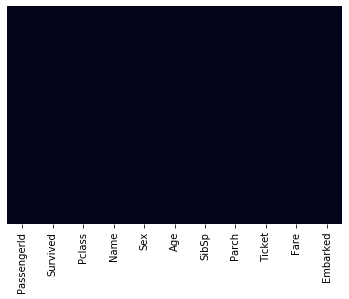

In [189]:
sns.heatmap(train.isnull(),yticklabels= False, cbar=False)

In [190]:
train['Sex'] = train['Sex'].replace({'male':1,'female':0})

In [191]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [192]:
new_Embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [193]:
new_Pclass = pd.get_dummies(train['Pclass'],drop_first = True)

In [194]:
train = pd.concat([train,new_Embarked,new_Pclass],axis=1)

In [195]:
train.drop(['PassengerId','Name','Ticket','Embarked','Pclass'],inplace=True ,axis = 1)  # if inplace = flase then train will not change

In [196]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Q,S,2,3
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Q           891 non-null uint8
S           891 non-null uint8
2           891 non-null uint8
3           891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [198]:
train.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 2, 3], dtype='object')

# Split the data

In [199]:
X = train.drop(['Survived'],axis =1)
Y = train['Survived']

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

In [202]:
stats = X.describe()

In [203]:
from tensorflow.keras.utils import to_categorical 

since our target variable represents a binary category which has been coded as numbers 0 and 1.

In [204]:
Y_train = to_categorical(Y_train) 
Y_test = to_categorical(Y_test)

# Normalization

In [205]:
def norm(x):                                        # normalization of train datasets
    return (x-stats.mean()/stats.std())
norm_X_train = norm(X_train)
norm_X_test = norm(X_test)

In [206]:
len(norm_X_train.keys())

9

In [207]:
len(norm_X_train)

668

In [208]:
len(Y_train)

668

# Build the model

In [209]:
from tensorflow.keras.layers import Dropout,Activation, Dense

In [275]:
def build_model():
  model = keras.Sequential()
  model.add(Dense(18, activation='relu', input_dim=len(norm_X_train.keys())))
  model.add(Dropout(0.3))
  model.add(Dense(18, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(2, activation='sigmoid'))
  
  adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='binary_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])
  return model

In [276]:
model = build_model()

In [277]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 18)                180       
_________________________________________________________________
dropout_34 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 18)                342       
_________________________________________________________________
dropout_35 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 38        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


In [278]:
history = model.fit(norm_X_train,Y_train,epochs=1200,validation_data=(norm_X_test,Y_test),batch_size= 8)

Train on 668 samples, validate on 223 samples
Epoch 1/1200
668/668 [==============================] - 1s 1ms/sample - loss: 3.5559 - acc: 0.5546 - val_loss: 0.9830 - val_acc: 0.6794
Epoch 2/1200
668/668 [==============================] - 0s 268us/sample - loss: 2.4750 - acc: 0.5374 - val_loss: 0.9150 - val_acc: 0.6816
Epoch 3/1200
668/668 [==============================] - 0s 268us/sample - loss: 1.7646 - acc: 0.5644 - val_loss: 0.8014 - val_acc: 0.6794
Epoch 4/1200
668/668 [==============================] - 0s 270us/sample - loss: 1.2986 - acc: 0.5704 - val_loss: 0.7681 - val_acc: 0.6704
Epoch 5/1200
668/668 [==============================] - 0s 268us/sample - loss: 1.0607 - acc: 0.5846 - val_loss: 0.7370 - val_acc: 0.6726
Epoch 6/1200
668/668 [==============================] - 0s 279us/sample - loss: 0.9393 - acc: 0.5936 - val_loss: 0.7245 - val_acc: 0.6614
Epoch 7/1200
668/668 [==============================] - 0s 272us/sample - loss: 0.8496 - acc: 0.5898 - val_loss: 0.7024 - val_ac

Epoch 60/1200
668/668 [==============================] - 0s 257us/sample - loss: 0.5190 - acc: 0.7552 - val_loss: 0.4802 - val_acc: 0.8004
Epoch 61/1200
668/668 [==============================] - 0s 262us/sample - loss: 0.5200 - acc: 0.7657 - val_loss: 0.4839 - val_acc: 0.8094
Epoch 62/1200
668/668 [==============================] - 0s 247us/sample - loss: 0.5193 - acc: 0.7747 - val_loss: 0.4858 - val_acc: 0.8027
Epoch 63/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.5016 - acc: 0.7769 - val_loss: 0.4771 - val_acc: 0.8004
Epoch 64/1200
668/668 [==============================] - 0s 242us/sample - loss: 0.5259 - acc: 0.7552 - val_loss: 0.4723 - val_acc: 0.7982
Epoch 65/1200
668/668 [==============================] - 0s 252us/sample - loss: 0.4986 - acc: 0.7792 - val_loss: 0.4675 - val_acc: 0.8027
Epoch 66/1200
668/668 [==============================] - 0s 245us/sample - loss: 0.5087 - acc: 0.7740 - val_loss: 0.4651 - val_acc: 0.8206
Epoch 67/1200
668/668 [====

Epoch 119/1200
668/668 [==============================] - 0s 277us/sample - loss: 0.4326 - acc: 0.8099 - val_loss: 0.4269 - val_acc: 0.8251
Epoch 120/1200
668/668 [==============================] - 0s 336us/sample - loss: 0.4457 - acc: 0.8129 - val_loss: 0.4575 - val_acc: 0.8027
Epoch 121/1200
668/668 [==============================] - 0s 303us/sample - loss: 0.4789 - acc: 0.7949 - val_loss: 0.4250 - val_acc: 0.8161
Epoch 122/1200
668/668 [==============================] - 0s 270us/sample - loss: 0.4418 - acc: 0.8166 - val_loss: 0.4516 - val_acc: 0.7982
Epoch 123/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.4595 - acc: 0.7987 - val_loss: 0.4244 - val_acc: 0.8341
Epoch 124/1200
668/668 [==============================] - 0s 270us/sample - loss: 0.4397 - acc: 0.8144 - val_loss: 0.4409 - val_acc: 0.8206
Epoch 125/1200
668/668 [==============================] - 0s 255us/sample - loss: 0.4411 - acc: 0.8106 - val_loss: 0.4394 - val_acc: 0.8117
Epoch 126/1200
668/6

668/668 [==============================] - 0s 200us/sample - loss: 0.4393 - acc: 0.8024 - val_loss: 0.4250 - val_acc: 0.8206
Epoch 178/1200
668/668 [==============================] - 0s 191us/sample - loss: 0.4165 - acc: 0.8219 - val_loss: 0.4252 - val_acc: 0.8161
Epoch 179/1200
668/668 [==============================] - 0s 216us/sample - loss: 0.4199 - acc: 0.8181 - val_loss: 0.4452 - val_acc: 0.8072
Epoch 180/1200
668/668 [==============================] - 0s 211us/sample - loss: 0.4297 - acc: 0.8159 - val_loss: 0.4196 - val_acc: 0.8274
Epoch 181/1200
668/668 [==============================] - 0s 214us/sample - loss: 0.4475 - acc: 0.7994 - val_loss: 0.4373 - val_acc: 0.8386
Epoch 182/1200
668/668 [==============================] - 0s 211us/sample - loss: 0.4030 - acc: 0.8241 - val_loss: 0.4206 - val_acc: 0.8274
Epoch 183/1200
668/668 [==============================] - 0s 203us/sample - loss: 0.4362 - acc: 0.8099 - val_loss: 0.4238 - val_acc: 0.8184
Epoch 184/1200
668/668 [===========

668/668 [==============================] - 0s 253us/sample - loss: 0.4289 - acc: 0.8076 - val_loss: 0.4230 - val_acc: 0.8206
Epoch 236/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.4088 - acc: 0.8174 - val_loss: 0.4336 - val_acc: 0.8184
Epoch 237/1200
668/668 [==============================] - 0s 252us/sample - loss: 0.4114 - acc: 0.8234 - val_loss: 0.4305 - val_acc: 0.8117
Epoch 238/1200
668/668 [==============================] - 0s 247us/sample - loss: 0.4203 - acc: 0.8129 - val_loss: 0.4274 - val_acc: 0.8229
Epoch 239/1200
668/668 [==============================] - 0s 455us/sample - loss: 0.4191 - acc: 0.8129 - val_loss: 0.4284 - val_acc: 0.8139
Epoch 240/1200
668/668 [==============================] - 0s 460us/sample - loss: 0.4215 - acc: 0.8189 - val_loss: 0.4198 - val_acc: 0.8161
Epoch 241/1200
668/668 [==============================] - 0s 261us/sample - loss: 0.4154 - acc: 0.8189 - val_loss: 0.4223 - val_acc: 0.8206
Epoch 242/1200
668/668 [===========

668/668 [==============================] - 0s 219us/sample - loss: 0.4034 - acc: 0.8293 - val_loss: 0.4357 - val_acc: 0.8072
Epoch 294/1200
668/668 [==============================] - 0s 232us/sample - loss: 0.4180 - acc: 0.8166 - val_loss: 0.4242 - val_acc: 0.8161
Epoch 295/1200
668/668 [==============================] - 0s 211us/sample - loss: 0.4362 - acc: 0.8001 - val_loss: 0.4393 - val_acc: 0.8206
Epoch 296/1200
668/668 [==============================] - 0s 212us/sample - loss: 0.4260 - acc: 0.8219 - val_loss: 0.4276 - val_acc: 0.8206
Epoch 297/1200
668/668 [==============================] - 0s 221us/sample - loss: 0.4168 - acc: 0.8159 - val_loss: 0.4335 - val_acc: 0.8161
Epoch 298/1200
668/668 [==============================] - 0s 222us/sample - loss: 0.4127 - acc: 0.8129 - val_loss: 0.4354 - val_acc: 0.8072
Epoch 299/1200
668/668 [==============================] - 0s 180us/sample - loss: 0.4090 - acc: 0.8121 - val_loss: 0.4284 - val_acc: 0.8117
Epoch 300/1200
668/668 [===========

668/668 [==============================] - 0s 234us/sample - loss: 0.4144 - acc: 0.8204 - val_loss: 0.4366 - val_acc: 0.8117
Epoch 352/1200
668/668 [==============================] - 0s 240us/sample - loss: 0.4158 - acc: 0.8159 - val_loss: 0.4456 - val_acc: 0.8049
Epoch 353/1200
668/668 [==============================] - 0s 217us/sample - loss: 0.3999 - acc: 0.8204 - val_loss: 0.4299 - val_acc: 0.8072
Epoch 354/1200
668/668 [==============================] - 0s 242us/sample - loss: 0.4291 - acc: 0.8069 - val_loss: 0.4305 - val_acc: 0.8161
Epoch 355/1200
668/668 [==============================] - 0s 226us/sample - loss: 0.3900 - acc: 0.8249 - val_loss: 0.4269 - val_acc: 0.8161
Epoch 356/1200
668/668 [==============================] - 0s 211us/sample - loss: 0.4272 - acc: 0.8159 - val_loss: 0.4390 - val_acc: 0.8206
Epoch 357/1200
668/668 [==============================] - 0s 309us/sample - loss: 0.4437 - acc: 0.8136 - val_loss: 0.4378 - val_acc: 0.8072
Epoch 358/1200
668/668 [===========

668/668 [==============================] - 0s 261us/sample - loss: 0.4368 - acc: 0.8069 - val_loss: 0.4205 - val_acc: 0.8251
Epoch 410/1200
668/668 [==============================] - 0s 247us/sample - loss: 0.3966 - acc: 0.8219 - val_loss: 0.4331 - val_acc: 0.8206
Epoch 411/1200
668/668 [==============================] - 0s 265us/sample - loss: 0.4146 - acc: 0.7994 - val_loss: 0.4282 - val_acc: 0.8117
Epoch 412/1200
668/668 [==============================] - 0s 285us/sample - loss: 0.4022 - acc: 0.8136 - val_loss: 0.4302 - val_acc: 0.8072
Epoch 413/1200
668/668 [==============================] - 0s 247us/sample - loss: 0.4179 - acc: 0.8204 - val_loss: 0.4303 - val_acc: 0.8072
Epoch 414/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.4041 - acc: 0.8263 - val_loss: 0.4240 - val_acc: 0.8117
Epoch 415/1200
668/668 [==============================] - 0s 271us/sample - loss: 0.4173 - acc: 0.8234 - val_loss: 0.4241 - val_acc: 0.8072
Epoch 416/1200
668/668 [===========

668/668 [==============================] - 0s 253us/sample - loss: 0.4078 - acc: 0.8174 - val_loss: 0.4200 - val_acc: 0.8206
Epoch 468/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.4078 - acc: 0.8084 - val_loss: 0.4290 - val_acc: 0.8161
Epoch 469/1200
668/668 [==============================] - 0s 259us/sample - loss: 0.4180 - acc: 0.8219 - val_loss: 0.4232 - val_acc: 0.8161
Epoch 470/1200
668/668 [==============================] - 0s 243us/sample - loss: 0.4064 - acc: 0.8039 - val_loss: 0.4320 - val_acc: 0.8161
Epoch 471/1200
668/668 [==============================] - 0s 249us/sample - loss: 0.4310 - acc: 0.7979 - val_loss: 0.4394 - val_acc: 0.8251
Epoch 472/1200
668/668 [==============================] - 0s 260us/sample - loss: 0.4000 - acc: 0.8263 - val_loss: 0.4220 - val_acc: 0.8251
Epoch 473/1200
668/668 [==============================] - 0s 248us/sample - loss: 0.4199 - acc: 0.8114 - val_loss: 0.4361 - val_acc: 0.8206
Epoch 474/1200
668/668 [===========

668/668 [==============================] - 0s 255us/sample - loss: 0.4097 - acc: 0.8106 - val_loss: 0.4406 - val_acc: 0.8027
Epoch 526/1200
668/668 [==============================] - 0s 261us/sample - loss: 0.3982 - acc: 0.8263 - val_loss: 0.4246 - val_acc: 0.8161
Epoch 527/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.4004 - acc: 0.8293 - val_loss: 0.4239 - val_acc: 0.8206
Epoch 528/1200
668/668 [==============================] - 0s 262us/sample - loss: 0.4100 - acc: 0.8278 - val_loss: 0.4270 - val_acc: 0.8161
Epoch 529/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.3993 - acc: 0.8249 - val_loss: 0.4344 - val_acc: 0.8206
Epoch 530/1200
668/668 [==============================] - 0s 277us/sample - loss: 0.3974 - acc: 0.8234 - val_loss: 0.4286 - val_acc: 0.8161
Epoch 531/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.4220 - acc: 0.8144 - val_loss: 0.4309 - val_acc: 0.8072
Epoch 532/1200
668/668 [===========

668/668 [==============================] - 0s 244us/sample - loss: 0.4039 - acc: 0.8016 - val_loss: 0.4344 - val_acc: 0.7982
Epoch 584/1200
668/668 [==============================] - 0s 276us/sample - loss: 0.4114 - acc: 0.8174 - val_loss: 0.4306 - val_acc: 0.8072
Epoch 585/1200
668/668 [==============================] - 0s 259us/sample - loss: 0.3980 - acc: 0.8166 - val_loss: 0.4301 - val_acc: 0.8117
Epoch 586/1200
668/668 [==============================] - 0s 262us/sample - loss: 0.4030 - acc: 0.8114 - val_loss: 0.4352 - val_acc: 0.8117
Epoch 587/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.3944 - acc: 0.8204 - val_loss: 0.4395 - val_acc: 0.8072
Epoch 588/1200
668/668 [==============================] - 0s 310us/sample - loss: 0.4222 - acc: 0.8099 - val_loss: 0.4276 - val_acc: 0.8161
Epoch 589/1200
668/668 [==============================] - 0s 265us/sample - loss: 0.4026 - acc: 0.8136 - val_loss: 0.4397 - val_acc: 0.8027
Epoch 590/1200
668/668 [===========

668/668 [==============================] - 0s 260us/sample - loss: 0.4192 - acc: 0.8189 - val_loss: 0.4199 - val_acc: 0.8117
Epoch 642/1200
668/668 [==============================] - 0s 265us/sample - loss: 0.4246 - acc: 0.8069 - val_loss: 0.4254 - val_acc: 0.8117
Epoch 643/1200
668/668 [==============================] - 0s 253us/sample - loss: 0.3980 - acc: 0.8144 - val_loss: 0.4270 - val_acc: 0.8117
Epoch 644/1200
668/668 [==============================] - 0s 266us/sample - loss: 0.3926 - acc: 0.8234 - val_loss: 0.4251 - val_acc: 0.8161
Epoch 645/1200
668/668 [==============================] - 0s 259us/sample - loss: 0.4054 - acc: 0.8204 - val_loss: 0.4238 - val_acc: 0.8161
Epoch 646/1200
668/668 [==============================] - 0s 263us/sample - loss: 0.4082 - acc: 0.8009 - val_loss: 0.4344 - val_acc: 0.8094
Epoch 647/1200
668/668 [==============================] - 0s 267us/sample - loss: 0.4014 - acc: 0.8263 - val_loss: 0.4264 - val_acc: 0.8161
Epoch 648/1200
668/668 [===========

668/668 [==============================] - 0s 265us/sample - loss: 0.4149 - acc: 0.8196 - val_loss: 0.4310 - val_acc: 0.8072
Epoch 700/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.4040 - acc: 0.8144 - val_loss: 0.4238 - val_acc: 0.8117
Epoch 701/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.3965 - acc: 0.8151 - val_loss: 0.4218 - val_acc: 0.8072
Epoch 702/1200
668/668 [==============================] - 0s 242us/sample - loss: 0.4126 - acc: 0.8204 - val_loss: 0.4240 - val_acc: 0.8027
Epoch 703/1200
668/668 [==============================] - 0s 260us/sample - loss: 0.4183 - acc: 0.8099 - val_loss: 0.4196 - val_acc: 0.8072
Epoch 704/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.4016 - acc: 0.8219 - val_loss: 0.4202 - val_acc: 0.8072
Epoch 705/1200
668/668 [==============================] - 0s 257us/sample - loss: 0.4056 - acc: 0.8084 - val_loss: 0.4252 - val_acc: 0.8072
Epoch 706/1200
668/668 [===========

668/668 [==============================] - 0s 262us/sample - loss: 0.3978 - acc: 0.8204 - val_loss: 0.4306 - val_acc: 0.8072
Epoch 758/1200
668/668 [==============================] - 0s 255us/sample - loss: 0.4091 - acc: 0.8069 - val_loss: 0.4225 - val_acc: 0.8206
Epoch 759/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.4183 - acc: 0.8114 - val_loss: 0.4199 - val_acc: 0.8206
Epoch 760/1200
668/668 [==============================] - 0s 263us/sample - loss: 0.4007 - acc: 0.8181 - val_loss: 0.4340 - val_acc: 0.8072
Epoch 761/1200
668/668 [==============================] - 0s 257us/sample - loss: 0.4133 - acc: 0.8219 - val_loss: 0.4429 - val_acc: 0.8072
Epoch 762/1200
668/668 [==============================] - 0s 265us/sample - loss: 0.4039 - acc: 0.8204 - val_loss: 0.4410 - val_acc: 0.8117
Epoch 763/1200
668/668 [==============================] - 0s 260us/sample - loss: 0.3838 - acc: 0.8249 - val_loss: 0.4233 - val_acc: 0.8117
Epoch 764/1200
668/668 [===========

668/668 [==============================] - 0s 266us/sample - loss: 0.3965 - acc: 0.8308 - val_loss: 0.4150 - val_acc: 0.8161
Epoch 816/1200
668/668 [==============================] - 0s 260us/sample - loss: 0.4035 - acc: 0.8159 - val_loss: 0.4294 - val_acc: 0.8161
Epoch 817/1200
668/668 [==============================] - 0s 248us/sample - loss: 0.4066 - acc: 0.8129 - val_loss: 0.4193 - val_acc: 0.8072
Epoch 818/1200
668/668 [==============================] - 0s 248us/sample - loss: 0.4045 - acc: 0.8069 - val_loss: 0.4307 - val_acc: 0.8161
Epoch 819/1200
668/668 [==============================] - 0s 253us/sample - loss: 0.4072 - acc: 0.8293 - val_loss: 0.4204 - val_acc: 0.8251
Epoch 820/1200
668/668 [==============================] - 0s 256us/sample - loss: 0.3962 - acc: 0.8144 - val_loss: 0.4183 - val_acc: 0.8117
Epoch 821/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.3956 - acc: 0.8323 - val_loss: 0.4248 - val_acc: 0.8072
Epoch 822/1200
668/668 [===========

668/668 [==============================] - 0s 261us/sample - loss: 0.4186 - acc: 0.8189 - val_loss: 0.4313 - val_acc: 0.8072
Epoch 874/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.4091 - acc: 0.8099 - val_loss: 0.4374 - val_acc: 0.7982
Epoch 875/1200
668/668 [==============================] - 0s 252us/sample - loss: 0.4157 - acc: 0.8114 - val_loss: 0.4182 - val_acc: 0.8206
Epoch 876/1200
668/668 [==============================] - 0s 259us/sample - loss: 0.4025 - acc: 0.8204 - val_loss: 0.4257 - val_acc: 0.8206
Epoch 877/1200
668/668 [==============================] - 0s 244us/sample - loss: 0.3953 - acc: 0.8189 - val_loss: 0.4228 - val_acc: 0.8161
Epoch 878/1200
668/668 [==============================] - 0s 247us/sample - loss: 0.4057 - acc: 0.8219 - val_loss: 0.4221 - val_acc: 0.8117
Epoch 879/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.4085 - acc: 0.8144 - val_loss: 0.4146 - val_acc: 0.8206
Epoch 880/1200
668/668 [===========

668/668 [==============================] - 0s 262us/sample - loss: 0.4043 - acc: 0.8234 - val_loss: 0.4281 - val_acc: 0.8117
Epoch 932/1200
668/668 [==============================] - 0s 261us/sample - loss: 0.4067 - acc: 0.8039 - val_loss: 0.4304 - val_acc: 0.8206
Epoch 933/1200
668/668 [==============================] - 0s 244us/sample - loss: 0.4130 - acc: 0.8159 - val_loss: 0.4352 - val_acc: 0.8117
Epoch 934/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.3834 - acc: 0.8278 - val_loss: 0.4269 - val_acc: 0.8117
Epoch 935/1200
668/668 [==============================] - 0s 250us/sample - loss: 0.4142 - acc: 0.8054 - val_loss: 0.4346 - val_acc: 0.8072
Epoch 936/1200
668/668 [==============================] - 0s 250us/sample - loss: 0.3935 - acc: 0.8159 - val_loss: 0.4357 - val_acc: 0.8027
Epoch 937/1200
668/668 [==============================] - 0s 260us/sample - loss: 0.4040 - acc: 0.8174 - val_loss: 0.4414 - val_acc: 0.8072
Epoch 938/1200
668/668 [===========

668/668 [==============================] - 0s 246us/sample - loss: 0.3824 - acc: 0.8234 - val_loss: 0.4372 - val_acc: 0.8161
Epoch 990/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.4019 - acc: 0.8219 - val_loss: 0.4296 - val_acc: 0.8117
Epoch 991/1200
668/668 [==============================] - 0s 245us/sample - loss: 0.4143 - acc: 0.8159 - val_loss: 0.4233 - val_acc: 0.8117
Epoch 992/1200
668/668 [==============================] - 0s 246us/sample - loss: 0.3974 - acc: 0.8323 - val_loss: 0.4264 - val_acc: 0.8161
Epoch 993/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.3973 - acc: 0.8293 - val_loss: 0.4282 - val_acc: 0.8072
Epoch 994/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.4066 - acc: 0.8204 - val_loss: 0.4309 - val_acc: 0.8161
Epoch 995/1200
668/668 [==============================] - 0s 257us/sample - loss: 0.4047 - acc: 0.8099 - val_loss: 0.4198 - val_acc: 0.8072
Epoch 996/1200
668/668 [===========

668/668 [==============================] - 0s 260us/sample - loss: 0.4100 - acc: 0.8189 - val_loss: 0.4251 - val_acc: 0.8161
Epoch 1048/1200
668/668 [==============================] - 0s 259us/sample - loss: 0.4029 - acc: 0.8129 - val_loss: 0.4237 - val_acc: 0.8161
Epoch 1049/1200
668/668 [==============================] - 0s 251us/sample - loss: 0.4094 - acc: 0.8054 - val_loss: 0.4255 - val_acc: 0.8117
Epoch 1050/1200
668/668 [==============================] - 0s 253us/sample - loss: 0.4017 - acc: 0.8114 - val_loss: 0.4254 - val_acc: 0.8161
Epoch 1051/1200
668/668 [==============================] - 0s 257us/sample - loss: 0.4176 - acc: 0.8069 - val_loss: 0.4277 - val_acc: 0.8161
Epoch 1052/1200
668/668 [==============================] - 0s 262us/sample - loss: 0.3879 - acc: 0.8278 - val_loss: 0.4244 - val_acc: 0.8117
Epoch 1053/1200
668/668 [==============================] - 0s 243us/sample - loss: 0.4060 - acc: 0.8174 - val_loss: 0.4306 - val_acc: 0.8027
Epoch 1054/1200
668/668 [====

668/668 [==============================] - 0s 254us/sample - loss: 0.3911 - acc: 0.8234 - val_loss: 0.4173 - val_acc: 0.8161
Epoch 1106/1200
668/668 [==============================] - 0s 255us/sample - loss: 0.4182 - acc: 0.8099 - val_loss: 0.4266 - val_acc: 0.8117
Epoch 1107/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.4025 - acc: 0.8039 - val_loss: 0.4222 - val_acc: 0.8117
Epoch 1108/1200
668/668 [==============================] - 0s 244us/sample - loss: 0.4036 - acc: 0.8308 - val_loss: 0.4261 - val_acc: 0.8161
Epoch 1109/1200
668/668 [==============================] - 0s 242us/sample - loss: 0.3887 - acc: 0.8278 - val_loss: 0.4179 - val_acc: 0.8206
Epoch 1110/1200
668/668 [==============================] - 0s 258us/sample - loss: 0.4027 - acc: 0.8219 - val_loss: 0.4276 - val_acc: 0.8117
Epoch 1111/1200
668/668 [==============================] - 0s 263us/sample - loss: 0.3915 - acc: 0.8234 - val_loss: 0.4271 - val_acc: 0.8117
Epoch 1112/1200
668/668 [====

Epoch 1163/1200
668/668 [==============================] - 0s 291us/sample - loss: 0.3977 - acc: 0.8204 - val_loss: 0.4185 - val_acc: 0.8072
Epoch 1164/1200
668/668 [==============================] - 0s 245us/sample - loss: 0.4015 - acc: 0.8234 - val_loss: 0.4290 - val_acc: 0.8206
Epoch 1165/1200
668/668 [==============================] - 0s 270us/sample - loss: 0.4068 - acc: 0.8114 - val_loss: 0.4436 - val_acc: 0.8072
Epoch 1166/1200
668/668 [==============================] - 0s 289us/sample - loss: 0.4105 - acc: 0.8099 - val_loss: 0.4391 - val_acc: 0.8072
Epoch 1167/1200
668/668 [==============================] - 0s 325us/sample - loss: 0.4028 - acc: 0.8234 - val_loss: 0.4294 - val_acc: 0.8072
Epoch 1168/1200
668/668 [==============================] - 0s 291us/sample - loss: 0.3852 - acc: 0.8249 - val_loss: 0.4210 - val_acc: 0.8072
Epoch 1169/1200
668/668 [==============================] - 0s 254us/sample - loss: 0.3972 - acc: 0.8353 - val_loss: 0.4130 - val_acc: 0.8161
Epoch 1170/12

In [279]:
model.evaluate(norm_X_train, Y_train)

668/668 [==============================] - 0s 29us/sample - loss: 0.3646 - acc: 0.8443


[0.36455481343283624, 0.84431136]

In [280]:
predictions = model.predict(norm_X_test)

In [281]:
model.evaluate(norm_X_test,Y_test)

223/223 [==============================] - 0s 55us/sample - loss: 0.4490 - acc: 0.8161


[0.44901433734081253, 0.8161435]

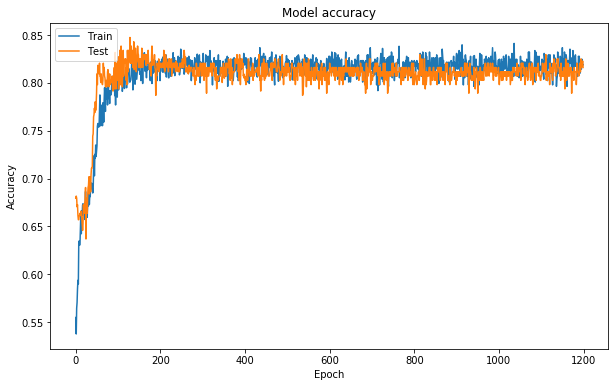

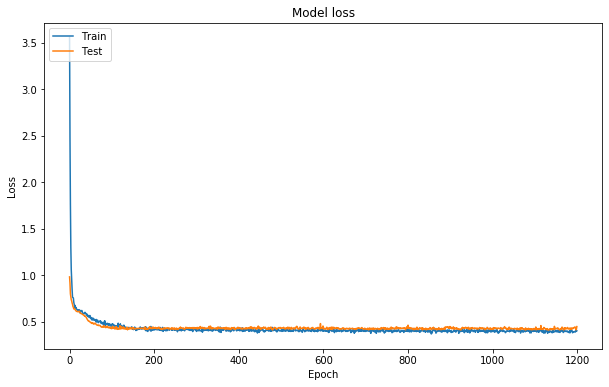

In [282]:
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [283]:
from tensorflow.keras.models import load_model
model.save('TITANIC.h5')